# 复正弦信号、实数信号的DFT

本文将介绍复正弦信号和实数信号的DFT性质，内容包括：
1. 复正弦信号的定义以及DFT性质
2. 实数信号的定义以及性质
3. 代码实例

## 复正弦信号

首先说明，复正弦信号只是一种数学定义上的信号，在实际生活中没有发现过这种信号

我们先来看一种较为简单且比较有规律的复正弦信号，它的定义如下：

$$
x_1[n] = e^{j2\pi k_0 n / N} \\
\text{n=0,1,2,...,N-1}
$$

其中，$e$是自然常熟，N表示信号的个数。

至于$k_0$，它是很关键的一个参数，我们可以将它理解为$x_1[n]$信号的周期个数。通常我们只能对一小段信号做DFT，因此需要先对信号截断，如果截断的信号刚好是整数周期，即$k_0$是一个整数，那么信号不发生泄露；相反，如果截断信号不是整数周期，即$k_0$是一个浮点数，那么发现信号泄露。

关于信号泄露，请参看这篇文章 [什么是泄露](https://mp.weixin.qq.com/s?__biz=MzI5NTM0MTQwNA==&mid=2247484164&idx=1&sn=fdaf2164306a9ca4166c2aa8713cacc5&scene=21#wechat_redirect)

## 复正弦信号的DFT

将复正弦信号的定义直接套上DFT的公式可以推出其DFT形式：
$$
\begin{array}{l}
X_1[k] &= \sum_{n=0}^{N-1} x_1[n] e^{-j2\pi k n / N} \\
       &= \sum_{n=0}^{N-1} e^{j2\pi k_0 n / N}e^{-j2\pi k n / N} \\
       &= \sum_{n=0}^{N-1} e^{j2\pi(k_0 - k)n / N}\\
\end{array}\tag{1}
$$

当 $k_0 = k$ 时，$e^{j2\pi(k_0 - k)n / N} = e^{0} = 1$，因此 
$$X_1[k] = \sum_{n=0}^{N-1} 1 = N, \text{if } k_0=k$$

当 $k_0 \neq k$ 时，利用等比数列求和公式可得
$$ 
\begin{array}{l}
X_1[k] &= \frac{1-e^{j2\pi(k_0 - k)n}}{1-e^{j2\pi(k_0 - k)n/N}} \\
       &= 0
\end{array}
$$


即
$$
X_1[k] = 
                        \begin{cases} 
                         N, & \text{if $k_0 = k$ } \\ 
                         0, & \text{if $k_0 \neq k$} 
                        \end{cases}
$$

这里仔细说明下$X_1[0] = 0$是怎么来的

1. $k_0$和$k$都是整数，那他们的差$k_0-k$也是整数
2. 当N是整数时，$e^{j2\pi N} = 0$，因此$1-e^{j2\pi(k_0 - k)n} = 0$
3. 根据1,2，推出$X_1[0] = 0$

等比数列求和的推导，可以参考这个公式:
$$
\sum_{k=0}^{N} z^k = 
                        \begin{cases} 
                        \frac{1-z^{N+1}}{1-z}, & \text{if $z\neq 1$ } \\ 
                         N, & \text{if $z = 1$} 
                        \end{cases}
$$

## 复正弦信号DFT实例

我们将通过代码来展示复正弦信号的性质，首先生成一段复正弦信号，然后进行DFT，画出结果

import 需要的包

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft

%matplotlib notebook

定义生成复正弦信号的函数

In [10]:
def generate_complex_signal(num_sample, k0):
    '''
    generate a complex signal
    
    num_sample : 信号的个数，即公式中的N
    k0 : 周期个数
    
    returns
    x : 复正弦信号
    '''
    
    n = np.arange(num_sample)
    x = np.exp(1j*2*np.pi*k0*n/num_sample)
    
    return x

生成信号，进行DFT，画出结果

当k0是整数时，DFT后的结果与预期的一致

<IPython.core.display.Javascript object>


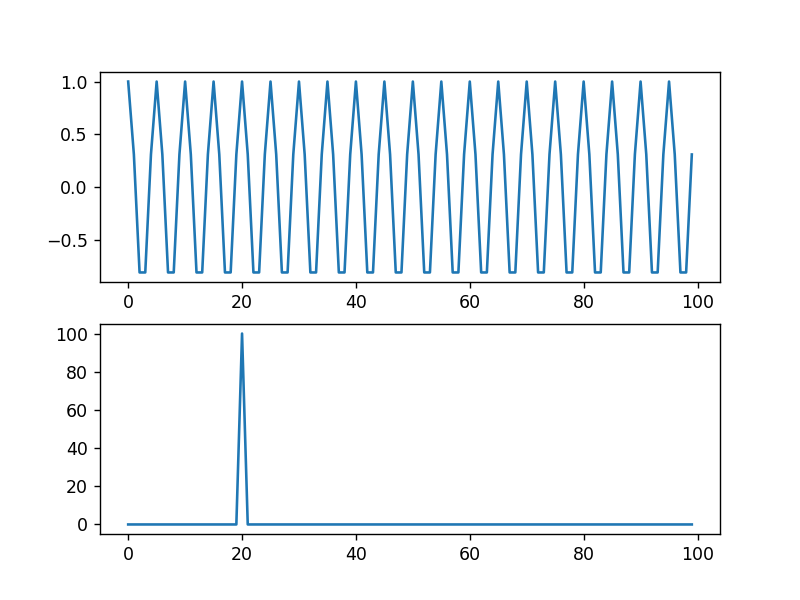

In [21]:
# DFT and plot the results
num_sample = 100
k0 = 20
x = generate_complex_signal(num_sample, k0)

X = fft(x)

plt.figure()
plt.subplot(211)
plt.plot(np.real(x))

plt.subplot(212)
plt.plot(np.real(X))
plt.show()

## 实数信号

我们生活中遇到的信号都是实数信号，它的定义如下：
$$
x_2[n] = A_0 \cos (2\pi k_0 n/N) = \frac{A_0}{2}(e^{j2\pi k_0 n/N} + e^{-j2\pi k_0 n/N})
$$

额...虽然生活中的信号都是实数信号，但是上面的式子是对实数信号的超高度浓缩版本，是最简单的版本。实际中的信号模型更为复杂。

## 实数信号的DFT

将实数信号带入DFT等式中

$$
\begin{array}{l}
X_2[k] &= \sum_{n=0}^{N-1} x_2[n] e^{-j2\pi k n / N} \\
       &= \sum_{n=0}^{N-1} \frac{A_0}{2}(e^{j2\pi k_0 n/N} + e^{-j2\pi k_0 n/N}) e^{-j2\pi k n / N} \\
       &= \sum_{n=0}^{N-1} \frac{A_0}{2}e^{-j2\pi(k-k_0) n / N} + \sum_{n=0}^{N-1} \frac{A_0}{2} e^{-j2\pi(k+k_0) n / N} \\
\end{array}\tag{2}
$$

当$k=k_0$或者$k=-k_0$时，(2)式中一项为0，另一项为$N\frac{A_0}{2}$

否则(2)式为0

即
$$
X_2[k] = 
                        \begin{cases} 
                         N\frac{A_0}{2}, & \text{if $k = k_0, -k_0$ } \\ 
                         0, & \text{if $k \neq k_0$} 
                        \end{cases}
$$

## 实数信号DFT实例

我们将通过代码来展示实数信号的性质，首先生成一段复正弦信号，然后进行DFT，画出结果

In [30]:
def generate_real_signal(num_sample, A, k0):
    '''
    generate real signal
    
    num_sample : 信号的个数，即公式中的N
    A  : 振幅
    k0 : 周期个数
    
    returns
    x : 实数信号
    '''
    hN = num_sample//2
    n = np.arange(-hN, hN)
    x = A * np.cos( 2*np.pi*k0*n/num_sample )
    
    return x

通过打印出结果，我们发现确实有2个峰值，但是并不是$k_0$和$-k_0$

其实只要做一次交换就可以，具体请看代码Y的实现

<IPython.core.display.Javascript object>


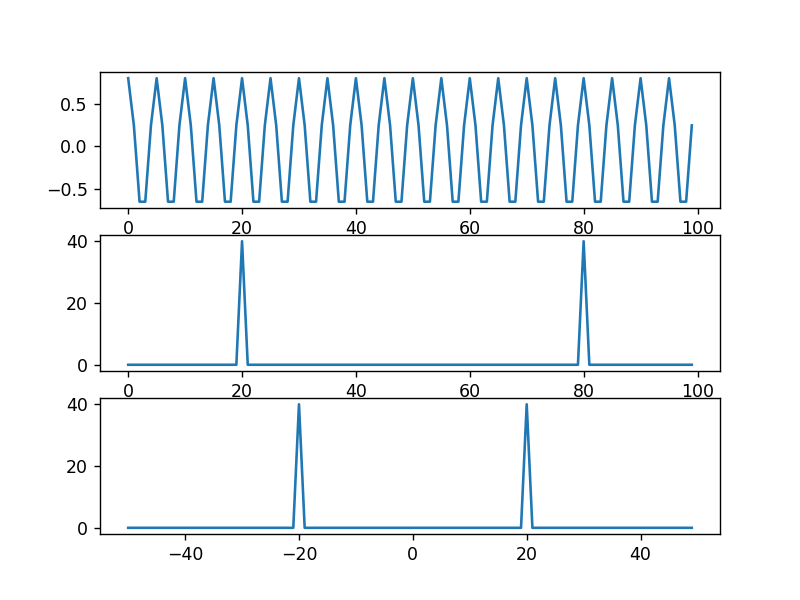

/home/hw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/hw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


In [44]:
# DFT and plot the results
num_sample = 100
k0 = 20
A = 0.8
x = generate_real_signal(num_sample, A, k0)

X = fft(fftbuffer)

plt.figure()
plt.subplot(311)
plt.plot(np.real(x))

plt.subplot(312)
plt.plot(np.real(X))

hM1 = (num_sample+1)//2
hM2 = num_sample//2
Y = np.zeros(num_sample)
Y[:hM1] = X[-hM1:]
Y[-hM2:] = X[:hM1]
plt.subplot(313)
x_axis = np.arange(-hM1, hM2)
plt.plot(x_axis, np.real(Y))
plt.show()